## Imports

In [5]:
# import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
# decision tree
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
# boost
from sklearn.ensemble import AdaBoostClassifier
# knn
from sklearn.neighbors import KNeighborsClassifier
# svm
from sklearn import preprocessing
from sklearn import svm
# nn
from sklearn.neural_network import MLPClassifier
## Model 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [44]:
games = pd.read_csv("games.csv")
games.count()
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [6]:
games = pd.read_csv("games.csv")
games.count()
cleaned_games = games.drop(['id', 'white_id', 'black_id', 'moves','created_at','last_move_at'], axis=1)
labelencoder = LabelEncoder()
cleaned_games['winner'] = labelencoder.fit_transform(cleaned_games['winner'])
cleaned_games['rated'] = labelencoder.fit_transform(cleaned_games['rated'])
cleaned_games['victory_status'] = labelencoder.fit_transform(cleaned_games['victory_status'])
cleaned_games['increment_code'] = labelencoder.fit_transform(cleaned_games['increment_code'])
cleaned_games['opening_eco'] = labelencoder.fit_transform(cleaned_games['opening_eco'])
cleaned_games['opening_name'] = labelencoder.fit_transform(cleaned_games['opening_name'])
cleaned_games


,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,0,13,2,2,110,1500,1191,248,1387,5
1,1,16,3,0,298,1322,1261,71,750,4
2,1,61,1,2,298,1496,1500,171,650,3
3,1,61,1,2,187,1439,1454,241,992,3
4,1,95,1,2,247,1523,1469,192,783,5
...,...,...,...,...,...,...,...,...,...,...
20053,1,24,3,2,21,1691,1220,61,191,2
20054,1,82,1,0,19,1233,1196,37,960,2
20055,1,35,1,2,19,1219,1286,239,977,3
20056,1,109,3,2,19,1360,1227,78,806,4


In [7]:
X = cleaned_games.drop('winner', axis=1)
y = cleaned_games['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [8]:

def draw_validation_curve( algo , param, train_scores, valid_scores ):
#     train_scores, valid_scores = validation_curve(classifier, X, y, param ,graph_range ,cv=cv ,n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)
    test_scores_std = np.std(valid_scores, axis=1)
    q20 = plt.figure(1)
    ax20 = q20.add_subplot(111)
    ax20.plot(1 - train_scores_mean,label = 'Training Error')
    ax20.plot(1 - test_scores_mean,label = 'Testing Error')
    ax20.set_ylabel('Error')
    ax20.set_xlabel(param)
    ax20.set_title( algo + ' - ' + param )
    ax20.legend(loc=0)

In [9]:
def draw_learning_curve(algo, train_sizes, train_scores, test_scores):
    cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    q20 = plt.figure(2)
    ax20 = q20.add_subplot(111)
    ax20.plot(train_sizes,1 - train_scores_mean,label = 'Training Error')
    ax20.plot(train_sizes,1 - test_scores_mean,label = 'Testing Error')
    ax20.set_ylabel('Error')
    ax20.set_xlabel('Data Size')
    ax20.set_title('Learning Curve for ' + algo)
    ax20.legend(loc=0)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    confusionMatrix = confusion_matrix(y_test,prediction)
    print (confusion_matrix)

In [ ]:
## decision tree

In [11]:
parameters = {'criterion':('entropy', 'gini'),\
              'max_depth':np.arange(start=1,stop=25),\
              'random_state':[1,2,3],\
              'max_features':('auto','sqrt','log2',None),\
              'max_leaf_nodes':[2,10,500,1000],\
              'min_samples_split':[1,2,10]}

In [12]:
decision_tree = DecisionTreeClassifier(max_depth=20)
clf = GridSearchCV(decision_tree, parameters, cv=5,n_jobs=13)
clf.fit(X_train, y_train)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.62913032 0.62746811 0.62952888]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=20), n_jobs=13,
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'max_features': ('auto', 'sqrt', 'log2', None),
                         'max_leaf_nodes': [2, 10, 500, 1000],
                         'min_samples_split': [1, 2, 10],
                         'random_state': [1, 2, 3]})

In [13]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=500, min_samples_split=10,
                       random_state=3)
{'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': 500, 'min_samples_split': 10, 'random_state': 3}
0.6504689610247272


In [14]:
draw_validation_curve('DecisionTree',DecisionTreeClassifier(),X_train, y_train,'max_depth',5,13)

TypeError: draw_validation_curve() takes 4 positional arguments but 7 were given

In [ ]:
draw_validation_curve('DecisionTree',DecisionTreeClassifier(),X_train, y_train,'max_leaf_nodes',5,13)

In [ ]:
draw_validation_curve('DecisionTree',DecisionTreeClassifier(),X_train, y_train,'min_samples_split',5,13)

In [15]:
train_sizes, train_scores, test_scores =learning_curve(DecisionTreeClassifier(criterion="entropy",\
                                       max_depth=4,max_leaf_nodes=10,random_state=3,max_features='log2',min_samples_split=2),\
    X_train, y_train, cv=cv, n_jobs=13,train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])

draw_learning_curve('Decision Tree', train_sizes, train_scores, test_scores)

NameError: name 'cv' is not defined

In [47]:

# visualization of decision tree
clf =  DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=2)
clf = clf.fit(X_train, y_train)
features = list(X_train.columns.values)
dot_data = tree.export_graphviz(clf, out_file=None, 
                        feature_names=features,  
                        class_names=list(map(str, set(y))),  
                        filled=True, rounded=True,  
                        special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(filename='chess_dt.dot')

'chess_dt.dot.pdf'

In [ ]:
## Boosting

In [18]:
parameters = {\
'learning_rate':[0.25,0.5,0.75,1.0,1.5,2],\
'random_state':[1,2,3],\
'n_estimators':[10,20,30,40,50]}
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
dt = DecisionTreeClassifier(max_depth=20,min_samples_split=75)
alf = AdaBoostClassifier(base_estimator = dt)
start = time.time()
clf = GridSearchCV(alf, parameters, cv=cv,n_jobs=14)
clf.fit(X_train, y_train)
end = time.time()
total = end - start
print(total)

320.7325699329376


In [19]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         min_samples_split=75),
                   learning_rate=0.25, n_estimators=10, random_state=3)
{'learning_rate': 0.25, 'n_estimators': 10, 'random_state': 3}
0.6693964371177878


/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=learning_rate, param_range=[0.1        0.13877551 0.17755102 0.21632653 0.25510204 0.29387755
 0.33265306 0.37142857 0.41020408 0.44897959 0.4877551  0.52653061
 0.56530612 0.60408163 0.64285714 0.68163265 0.72040816 0.75918367
 0.79795918 0.83673469 0.8755102  0.91428571 0.95306122 0.99183673
 1.03061224 1.06938776 1.10816327 1.14693878 1.18571429 1.2244898
 1.26326531 1.30204082 1.34081633 1.37959184 1.41836735 1.45714286
 1.49591837 1.53469388 1.57346939 1.6122449  1.65102041 1.68979592
 1.72857143 1.76734694 1.80612245 1.84489796 1.88367347 1.92244898
 1.96122449 2.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


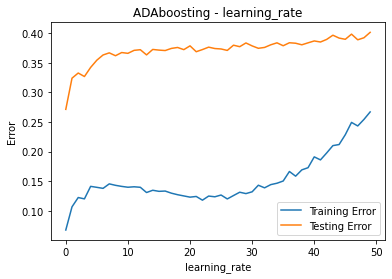

In [20]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(base_estimator = dt),\
                                              X_train, y_train,'learning_rate',\
                                              np.linspace(start=0.1,stop=2,num=50),cv=5,n_jobs=14)
draw_validation_curve('ADAboosting', 'learning_rate', train_scores, valid_scores)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_estimators, param_range=[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


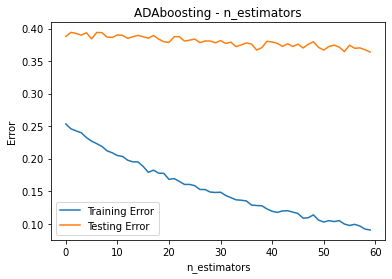

In [22]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(base_estimator = dt), \
                                              X_train, y_train,'n_estimators',\
                                              np.arange(start=10,stop=70),cv=5,n_jobs=14)
draw_validation_curve('ADAboosting', 'n_estimators', train_scores, valid_scores)

<function confusion_matrix at 0x7ffed5768790>


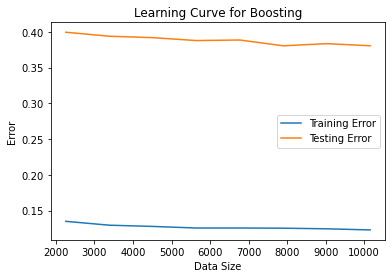

In [23]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
train_sizes, train_scores, test_scores =\
 learning_curve(AdaBoostClassifier(base_estimator = dt,learning_rate=1.0,random_state=3,n_estimators=50),\
 X_train, y_train, cv=cv, n_jobs=14,\
  train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
draw_learning_curve('Boosting', train_sizes, train_scores, test_scores)

## k-Nearest Neighbors

In [24]:
parameters = {'algorithm':('auto','ball_tree','kd_tree','brute'),'n_neighbors':[1,3,5,7,10,15,20],\
              'leaf_size':[4,6,8,10,12,14]}
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
dt = KNeighborsClassifier()
clf = GridSearchCV(dt, parameters, cv=5,n_jobs=13)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=13,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [4, 6, 8, 10, 12, 14],
                         'n_neighbors': [1, 3, 5, 7, 10, 15, 20]})

In [25]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

KNeighborsClassifier(leaf_size=4, n_neighbors=15)
{'algorithm': 'auto', 'leaf_size': 4, 'n_neighbors': 15}
0.6003456386160668


In [26]:
draw_validation_curve('KNeighbors', KNeighborsClassifier(),X_train, y_train,'n_neighbors', cv ,13)

TypeError: draw_validation_curve() takes 4 positional arguments but 7 were given

<function confusion_matrix at 0x7ffed5768790>


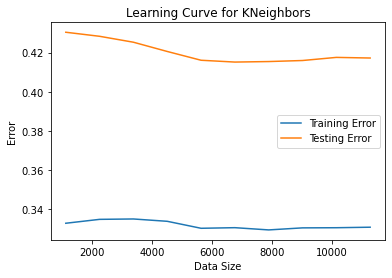

In [27]:

train_sizes, train_scores, test_scores =\
 learning_curve(KNeighborsClassifier(algorithm='auto',n_neighbors=10,leaf_size=4),\
                X_train, y_train, cv=cv, n_jobs=13,\
  train_sizes=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
draw_learning_curve('KNeighbors' , train_sizes, train_scores, test_scores)

In [ ]:
## Support Vector Machines

In [28]:
X = preprocessing.scale(X_train)
parameters = {'kernel':('rbf','linear'),\
'C':[0.0001,0.001,0.01,0.1,1.0,1.01,1.001,1.0001],\
'gamma':np.logspace(start=-1, stop=2, num=15)}
svm_i = svm.SVC(cache_size=15000)
clf = GridSearchCV(svm_i, parameters, cv=5,n_jobs=10)
clf.fit(X, y_train)

GridSearchCV(cv=5, estimator=SVC(cache_size=15000), n_jobs=10,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 1.01, 1.001,
                               1.0001],
                         'gamma': array([  0.1       ,   0.16378937,   0.26826958,   0.43939706,
         0.71968567,   1.17876863,   1.93069773,   3.16227766,
         5.17947468,   8.48342898,  13.89495494,  22.75845926,
        37.2759372 ,  61.05402297, 100.        ]),
                         'kernel': ('rbf', 'linear')})

In [29]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

SVC(C=0.1, cache_size=15000, gamma=0.1, kernel='linear')
{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.6644956752084173


/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=C, param_range=[1.00000000e-04 4.09142857e-02 8.17285714e-02 1.22542857e-01
 1.63357143e-01 2.04171429e-01 2.44985714e-01 2.85800000e-01
 3.26614286e-01 3.67428571e-01 4.08242857e-01 4.49057143e-01
 4.89871429e-01 5.30685714e-01 5.71500000e-01 6.12314286e-01
 6.53128571e-01 6.93942857e-01 7.34757143e-01 7.75571429e-01
 8.16385714e-01 8.57200000e-01 8.98014286e-01 9.38828571e-01
 9.79642857e-01 1.02045714e+00 1.06127143e+00 1.10208571e+00
 1.14290000e+00 1.18371429e+00 1.22452857e+00 1.26534286e+00
 1.30615714e+00 1.34697143e+00 1.38778571e+00 1.42860000e+00
 1.46941429e+00 1.51022857e+00 1.55104286e+00 1.59185714e+00
 1.63267143e+00 1.67348571e+00 1.71430000e+00 1.75511429e+00
 1.79592857e+00 1.83674286e+00 1.87755714e+00 1.91837143e+00
 1.95918571e+00 2.00000000e+00] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in

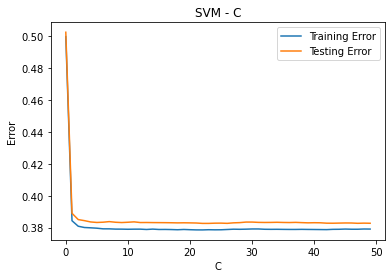

In [30]:
train_scores, valid_scores = validation_curve(svm.SVC(cache_size=15000), X_train, y_train,'C',\
                                              np.linspace(start=.0001,stop=2),cv=cv, n_jobs=14)
draw_validation_curve('SVM', 'C', train_scores, valid_scores)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=gamma, param_range=[  0.1          0.11513954   0.13257114   0.1526418    0.17575106
   0.20235896   0.23299518   0.26826958   0.30888436   0.35564803
   0.40949151   0.47148664   0.54286754   0.62505519   0.71968567
   0.82864277   0.95409548   1.09854114   1.26485522   1.45634848
   1.67683294   1.93069773   2.22299648   2.55954792   2.9470517
   3.39322177   3.90693994   4.49843267   5.17947468   5.96362332
   6.86648845   7.90604321   9.10298178  10.48113134  12.06792641
  13.89495494  15.9985872   18.42069969  21.20950888  24.42053095
  28.11768698  32.37457543  37.2759372   42.9193426   49.41713361
  56.89866029  65.51285569  75.43120063  86.85113738 100.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


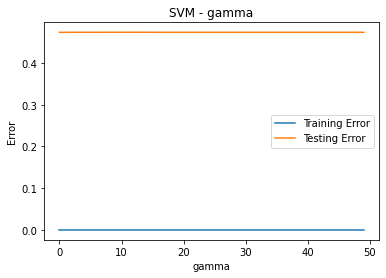

In [31]:

train_scores, valid_scores = validation_curve(svm.SVC(cache_size=15000), \
                                              X_train, y_train,'gamma',\
                                              np.logspace(start=-1, stop=2),cv=cv, n_jobs=14)
draw_validation_curve('SVM', 'gamma', train_scores, valid_scores)

<function confusion_matrix at 0x7ffed5768790>


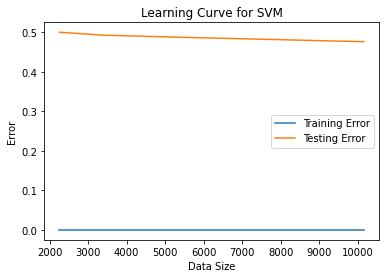

In [32]:

train_sizes, train_scores, test_scores =\
 learning_curve(svm.SVC(cache_size=15000,C=1.001,kernel='rbf',tol=0.5,gamma=0.1),\
 X_train, y_train, cv=cv, n_jobs=14,\
  train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
draw_learning_curve('SVM', train_sizes, train_scores, test_scores)

In [33]:
## Neural Networks

In [34]:

parameters = {'activation':('identity','logistic','tanh','relu'),\
'alpha':[0.0001,0.001,0.01],\
'learning_rate':('constant','invscaling','adaptive'),\
'learning_rate_init':[0.0001,0.001,0.01,.1],\
'hidden_layer_sizes':[(2,), (5,), (10,)]}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
mlp = MLPClassifier(max_iter=2000)
start = time.time()
clf = GridSearchCV(mlp, parameters, cv=5,n_jobs=14)
clf.fit(X_train, y_train)
end = time.time()
total = end - start

In [35]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,),
              learning_rate='adaptive', learning_rate_init=0.0001,
              max_iter=2000)
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001}
0.6644289206847542


/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-06 1.18367347e-06 1.36734694e-06 1.55102041e-06
 1.73469388e-06 1.91836735e-06 2.10204082e-06 2.28571429e-06
 2.46938776e-06 2.65306122e-06 2.83673469e-06 3.02040816e-06
 3.20408163e-06 3.38775510e-06 3.57142857e-06 3.75510204e-06
 3.93877551e-06 4.12244898e-06 4.30612245e-06 4.48979592e-06
 4.67346939e-06 4.85714286e-06 5.04081633e-06 5.22448980e-06
 5.40816327e-06 5.59183673e-06 5.77551020e-06 5.95918367e-06
 6.14285714e-06 6.32653061e-06 6.51020408e-06 6.69387755e-06
 6.87755102e-06 7.06122449e-06 7.24489796e-06 7.42857143e-06
 7.61224490e-06 7.79591837e-06 7.97959184e-06 8.16326531e-06
 8.34693878e-06 8.53061224e-06 8.71428571e-06 8.89795918e-06
 9.08163265e-06 9.26530612e-06 9.44897959e-06 9.63265306e-06
 9.81632653e-06 1.00000000e-05] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will resul

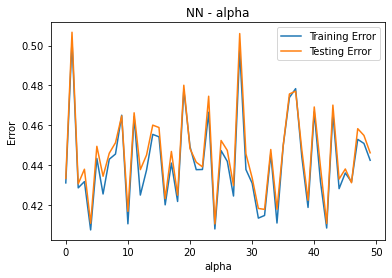

In [36]:
train_scores, valid_scores = validation_curve(MLPClassifier(max_iter=2000), X_train, y_train,'alpha',\
                                              np.linspace(start=0.000001,stop=0.00001),cv=5,n_jobs=14)
draw_validation_curve('NN', 'alpha', train_scores, valid_scores)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=learning_rate_init, param_range=[1.00000000e-04 8.26122449e-03 1.64224490e-02 2.45836735e-02
 3.27448980e-02 4.09061224e-02 4.90673469e-02 5.72285714e-02
 6.53897959e-02 7.35510204e-02 8.17122449e-02 8.98734694e-02
 9.80346939e-02 1.06195918e-01 1.14357143e-01 1.22518367e-01
 1.30679592e-01 1.38840816e-01 1.47002041e-01 1.55163265e-01
 1.63324490e-01 1.71485714e-01 1.79646939e-01 1.87808163e-01
 1.95969388e-01 2.04130612e-01 2.12291837e-01 2.20453061e-01
 2.28614286e-01 2.36775510e-01 2.44936735e-01 2.53097959e-01
 2.61259184e-01 2.69420408e-01 2.77581633e-01 2.85742857e-01
 2.93904082e-01 3.02065306e-01 3.10226531e-01 3.18387755e-01
 3.26548980e-01 3.34710204e-01 3.42871429e-01 3.51032653e-01
 3.59193878e-01 3.67355102e-01 3.75516327e-01 3.83677551e-01
 3.91838776e-01 4.00000000e-01] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional argumen

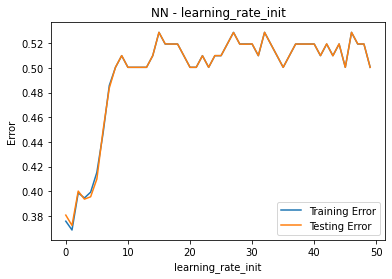

In [37]:
train_scores, valid_scores = validation_curve(MLPClassifier(max_iter=2000), X_train, y_train,'learning_rate_init',\
                                              np.linspace(start=0.0001,stop=0.4),cv=5,n_jobs=14)

draw_validation_curve('NN', 'learning_rate_init', train_scores, valid_scores)

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=hidden_layer_sizes, param_range=[(2,), (5,), (10,)] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


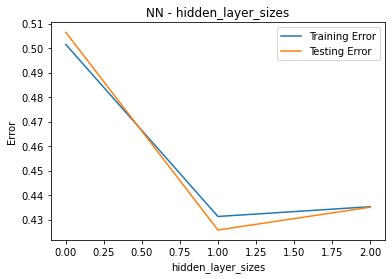

In [38]:

train_scores, valid_scores = validation_curve(MLPClassifier(max_iter=2000), \
                                              X_train, y_train,'hidden_layer_sizes',\
                                              [(2,), (5,), (10,)],cv=5,n_jobs=13)
draw_validation_curve('NN', 'hidden_layer_sizes', train_scores, valid_scores)

<function confusion_matrix at 0x7ffed5768790>


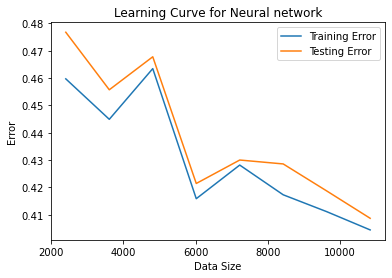

In [39]:

train_sizes, train_scores, test_scores =\
 learning_curve(MLPClassifier(activation='tanh',alpha=0.001,max_iter=2000,\
                              learning_rate='invscaling',learning_rate_init=0.001,hidden_layer_sizes=(10,)),\
 X_train, y_train, cv=cv, n_jobs=14,\
  train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
draw_learning_curve('Neural network', train_sizes, train_scores, test_scores)